In [1]:
# Adithya Sunilkumar - IMT2021068
# Anant Ojha - IMT2021102
# Kevin Adesara - IMT2021070

#Import all necessary libraries and get file path

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
file_path = '/kaggle/input/hospital/train.csv'

In [2]:
#Summarizes column statistics: Mode, NULL count, Top 10 value frequency % (All columns having more than 30% NULL are marked as DROP)

df = pd.read_csv(file_path)
print("Total number of rows: " + str(df.shape[0]))

for column in df.columns:
    # Get the frequency of each value, including null
    value_counts = df[column].value_counts(dropna=False)
    
    # Calculate the percentage frequency
    percentage_frequency = value_counts / len(df) * 100
    
    # Calculate the mode (excluding null)
    mode_value = df[column].mode().iloc[0]
    
    # Count NULL values
    null_count = df[column].isnull().sum()
    warning = ""
    if null_count / df.shape[0] > 0.3:
        warning = "[DROP]"

    print(f"\nFeature: {column} " + warning)
    print(f"Mode Value (Excluding Null): {mode_value}")
    print(f"Count of NULL Values: {null_count}")
    print("Top 10 Percentage Frequency:")
    print(percentage_frequency.head(10))
    


Total number of rows: 71236

Feature: enc_id 
Mode Value (Excluding Null): 15738
Count of NULL Values: 0
Top 10 Percentage Frequency:
enc_id
88346340     0.001404
173703612    0.001404
369705920    0.001404
154119606    0.001404
152336550    0.001404
360795374    0.001404
30581946     0.001404
134098668    0.001404
66057126     0.001404
140109588    0.001404
Name: count, dtype: float64

Feature: patient_id 
Mode Value (Excluding Null): 88785891
Count of NULL Values: 0
Top 10 Percentage Frequency:
patient_id
88785891    0.036498
88227540    0.029479
43140906    0.029479
23199021    0.028076
23643405    0.026672
29903877    0.025268
1660293     0.023864
37096866    0.023864
90609804    0.022461
88681950    0.022461
Name: count, dtype: float64

Feature: race 
Mode Value (Excluding Null): Caucasian
Count of NULL Values: 1621
Top 10 Percentage Frequency:
race
Caucasian          74.924196
AfricanAmerican    18.741928
NaN                 2.275535
Hispanic            2.004604
Other            

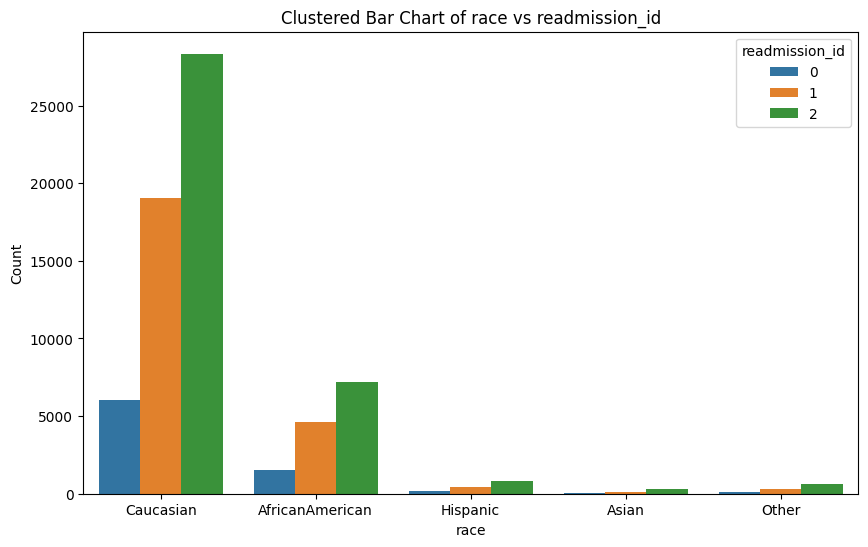

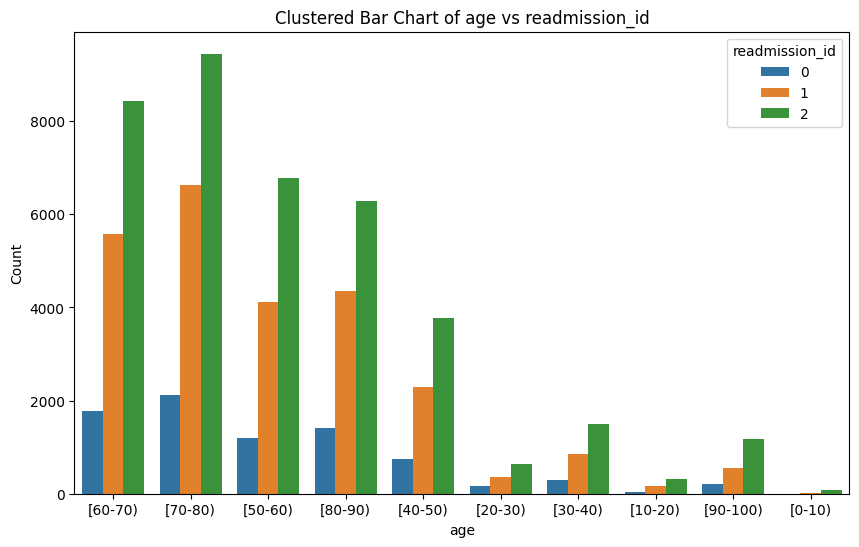

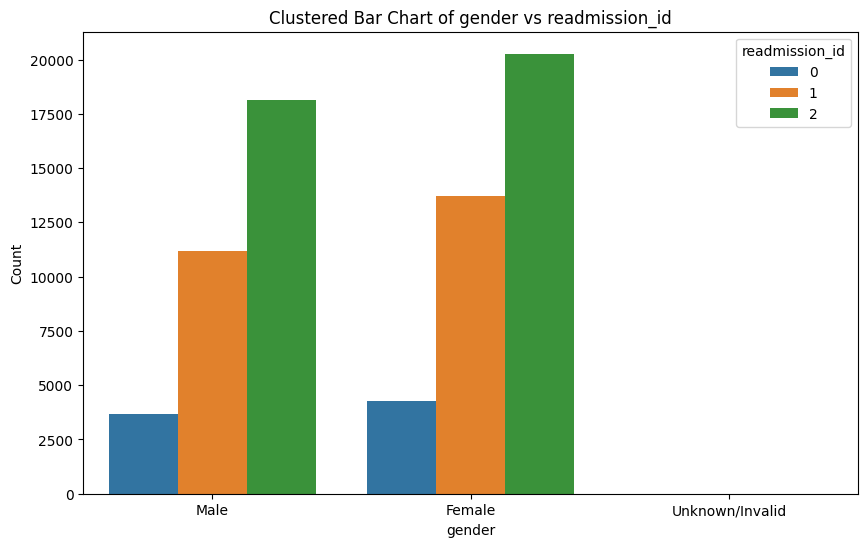

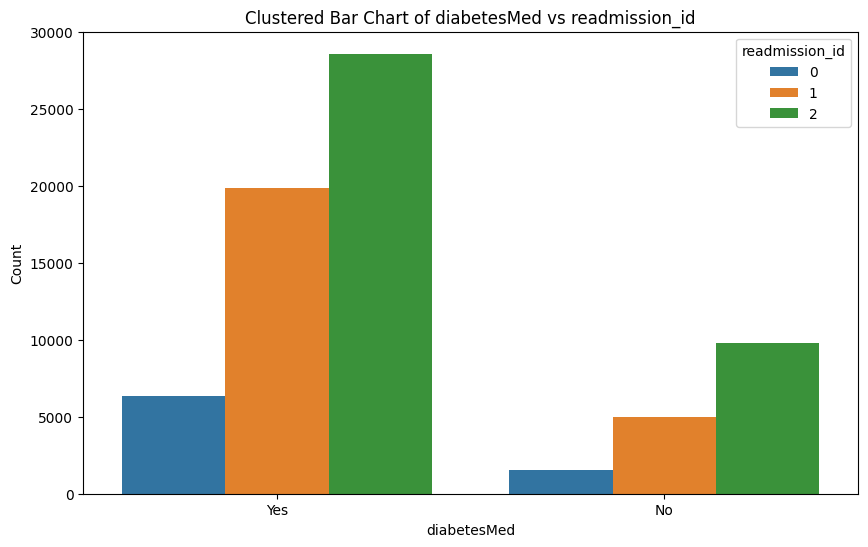

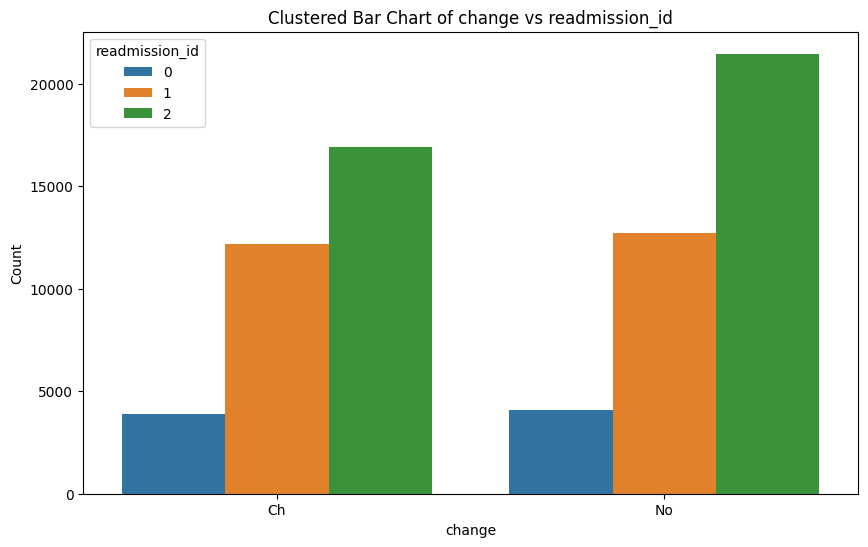

In [3]:
#Clustered bar graph, used for categorical features. Five examples are given below

df = pd.read_csv(file_path)
features_to_plot = ['race', 'age', 'gender', 'diabetesMed', 'change']
target_variable = 'readmission_id'

for input_feature in features_to_plot:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=input_feature, hue=target_variable, data=df)
    plt.title('Clustered Bar Chart of {} vs {}'.format(input_feature, target_variable))
    plt.xlabel(input_feature)
    plt.ylabel('Count')
    plt.legend(title=target_variable)
    plt.show()

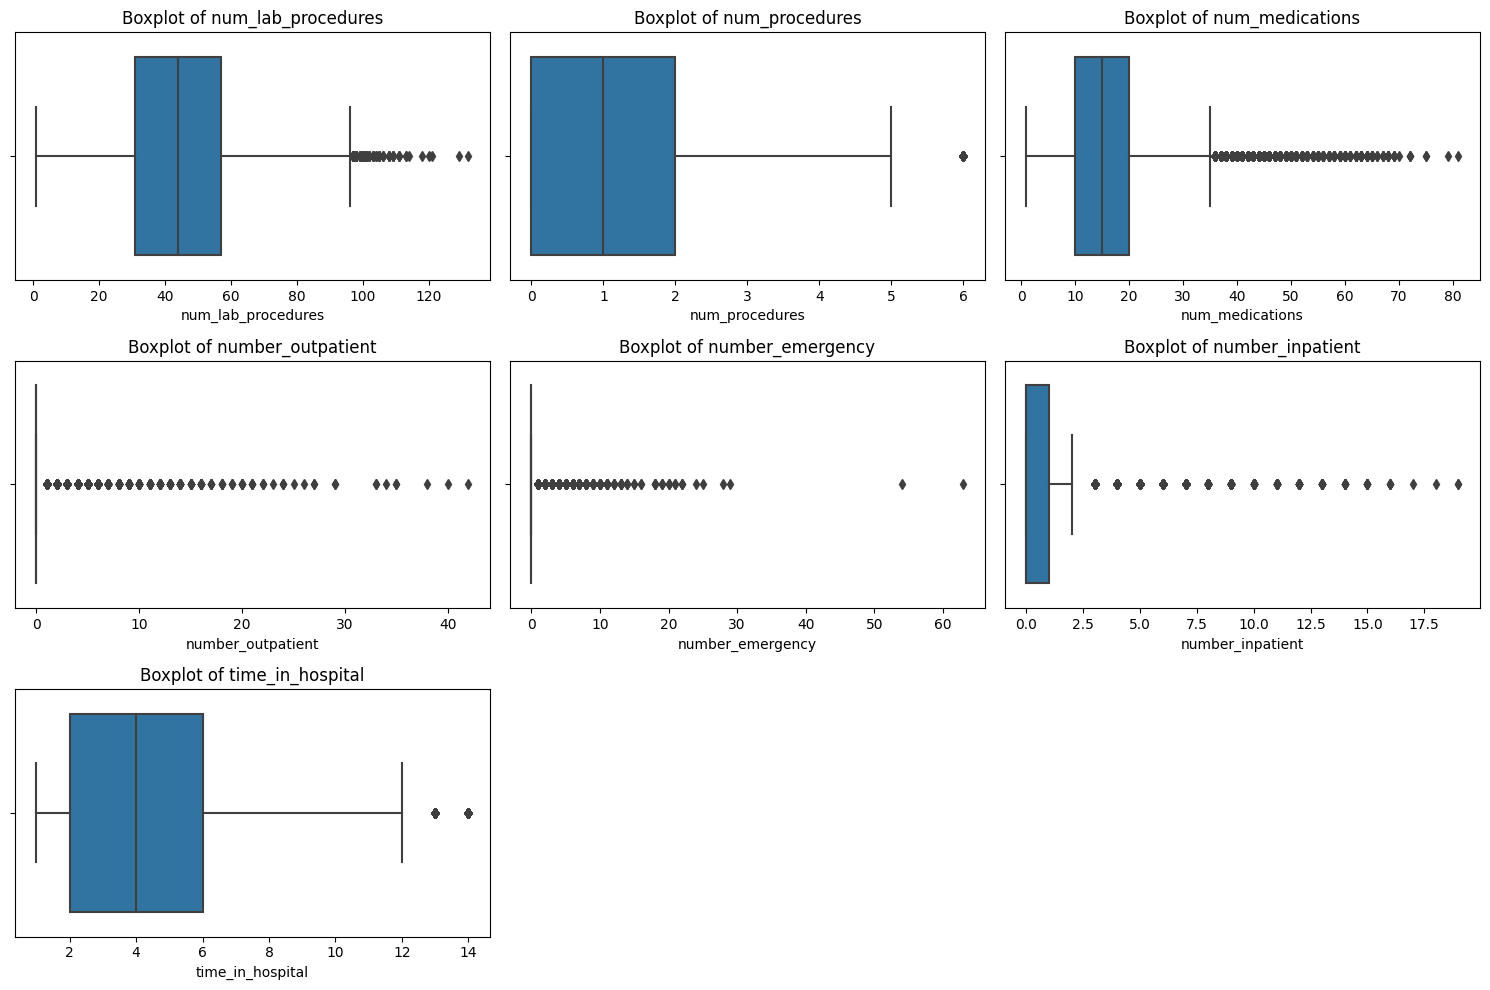

In [4]:
#Box plot for numeric features. Whiskers are at a distance of 1.5IQR from the box

df = pd.read_csv(file_path)
numeric_columns = ['num_lab_procedures', 'num_procedures', 'num_medications',
                    'number_outpatient', 'number_emergency', 'number_inpatient', 'time_in_hospital']


plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)  # Adjust the subplot grid based on the number of numeric columns
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()


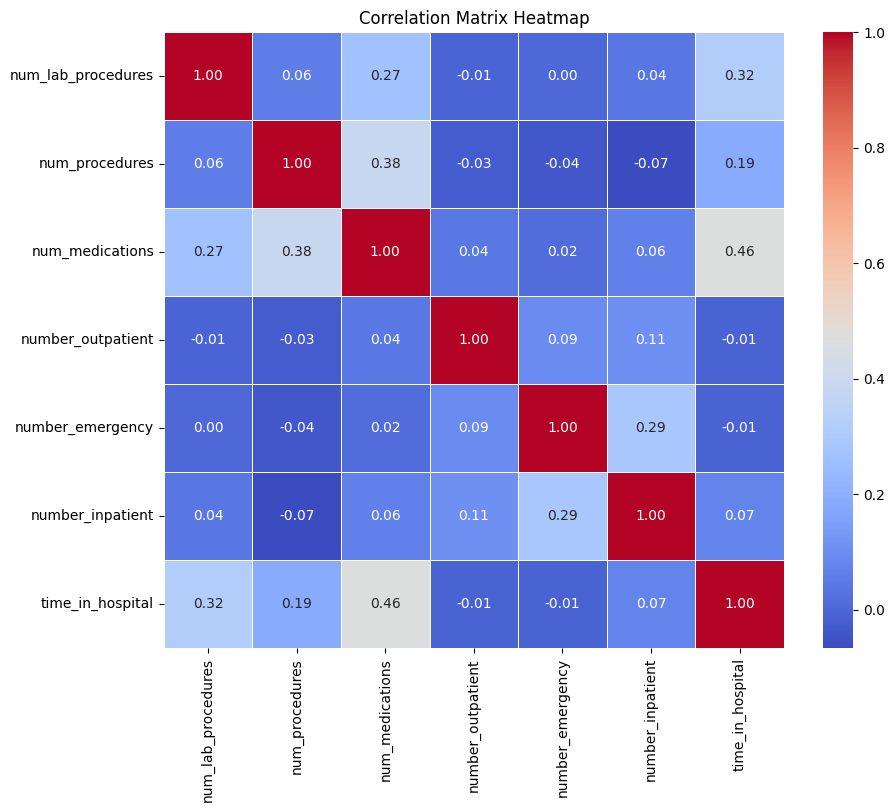

In [5]:
#Heat map for the numeric data. Given correlation coefficient c, correlation is (Strong: If c > 0.7, Moderate: If c > 0.5, else Weak)

df = pd.read_csv(file_path)
numeric_columns = ['num_lab_procedures', 'num_procedures', 'num_medications',
                    'number_outpatient', 'number_emergency', 'number_inpatient', 'time_in_hospital']

numeric_df = df[numeric_columns]
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()
